In [27]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

In [28]:
# Define paths
original_dataset_dir = 'C:/Users/AJ/OneDrive/Desktop/school/Nueral/Neural Jupyter/Project 2/dataset'  # Path to original dataset
base_dir = 'C:/Users/AJ/OneDrive/Desktop/school/Nueral/Neural Jupyter/Project 2/augmented'  # Path to save the split data

In [29]:
# Define split ratios and target number of images per class
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15
#target_images_per_class = 250

In [30]:
# Set up ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

In [31]:
# Create directories for the splits
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [32]:
# Ensure base directory exists
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

In [33]:
# Calculate the minimum number of images across all classes
min_images_per_class = min(len(os.listdir(os.path.join(original_dataset_dir, class_name))) 
                           for class_name in os.listdir(original_dataset_dir))

In [34]:
# Create subdirectories for each class in train, validation, and test directories
for class_name in os.listdir(original_dataset_dir):
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get list of all images in the current class and shuffle them
    class_dir = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    # Select only the minimum number of images per class for balance
    images = images[:min_images_per_class]

    # Calculate the split indices
    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * validation_ratio)

    # Split the images into train, validation, and test sets
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copy images to the respective directories
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(train_dir, class_name, image)
        shutil.copyfile(src, dst)

    for image in val_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(val_dir, class_name, image)
        shutil.copyfile(src, dst)

    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_dir, class_name, image)
        shutil.copyfile(src, dst)

print("Data has been split, balanced, and copied successfully!")

Data has been split, balanced, and copied successfully!


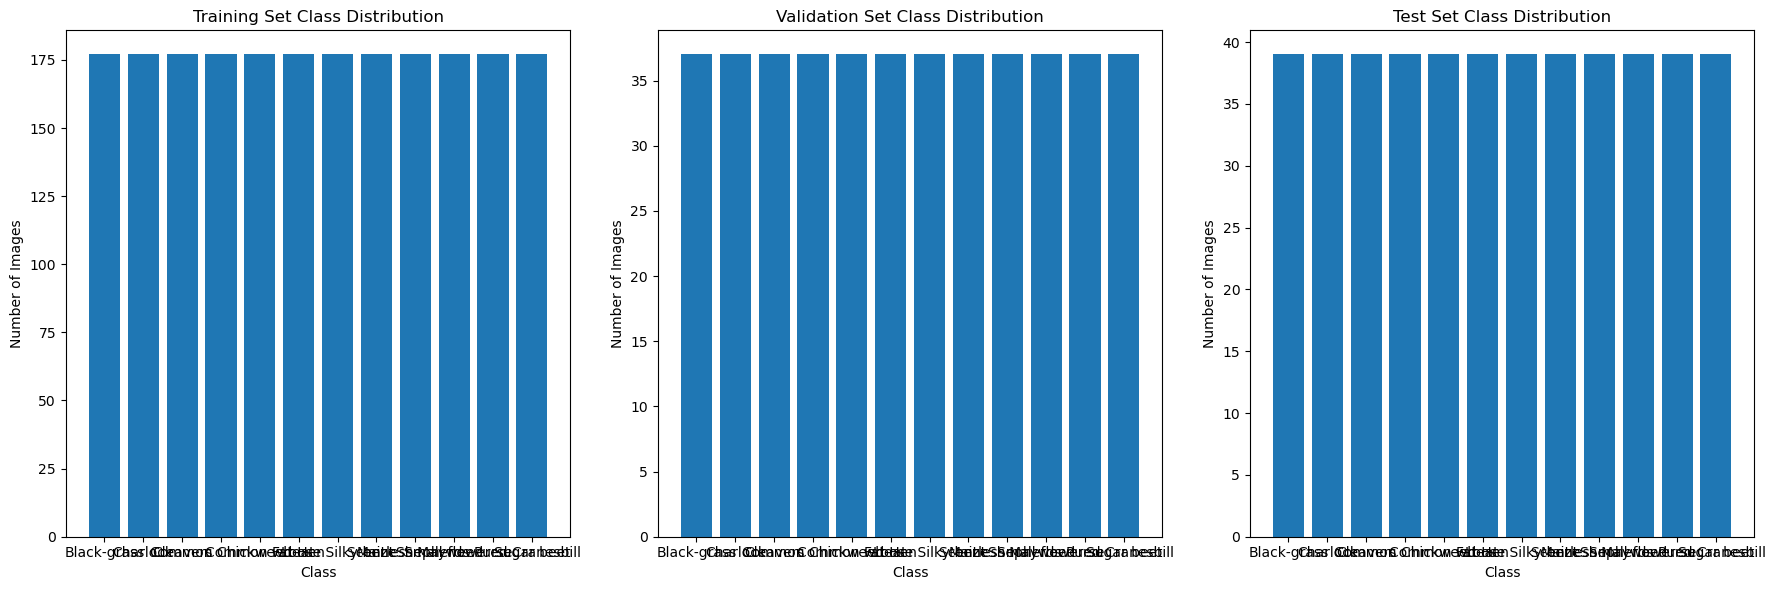

In [35]:
# Count images in each class for train, validation, and test sets
train_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir)}
val_counts = {class_name: len(os.listdir(os.path.join(val_dir, class_name))) for class_name in os.listdir(val_dir)}
test_counts = {class_name: len(os.listdir(os.path.join(test_dir, class_name))) for class_name in os.listdir(test_dir)}

# Plotting the counts
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot training set distribution
ax[0].bar(train_counts.keys(), train_counts.values())
ax[0].set_title('Training Set Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Images')

# Plot validation set distribution
ax[1].bar(val_counts.keys(), val_counts.values())
ax[1].set_title('Validation Set Class Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Images')

# Plot test set distribution
ax[2].bar(test_counts.keys(), test_counts.values())
ax[2].set_title('Test Set Class Distribution')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()